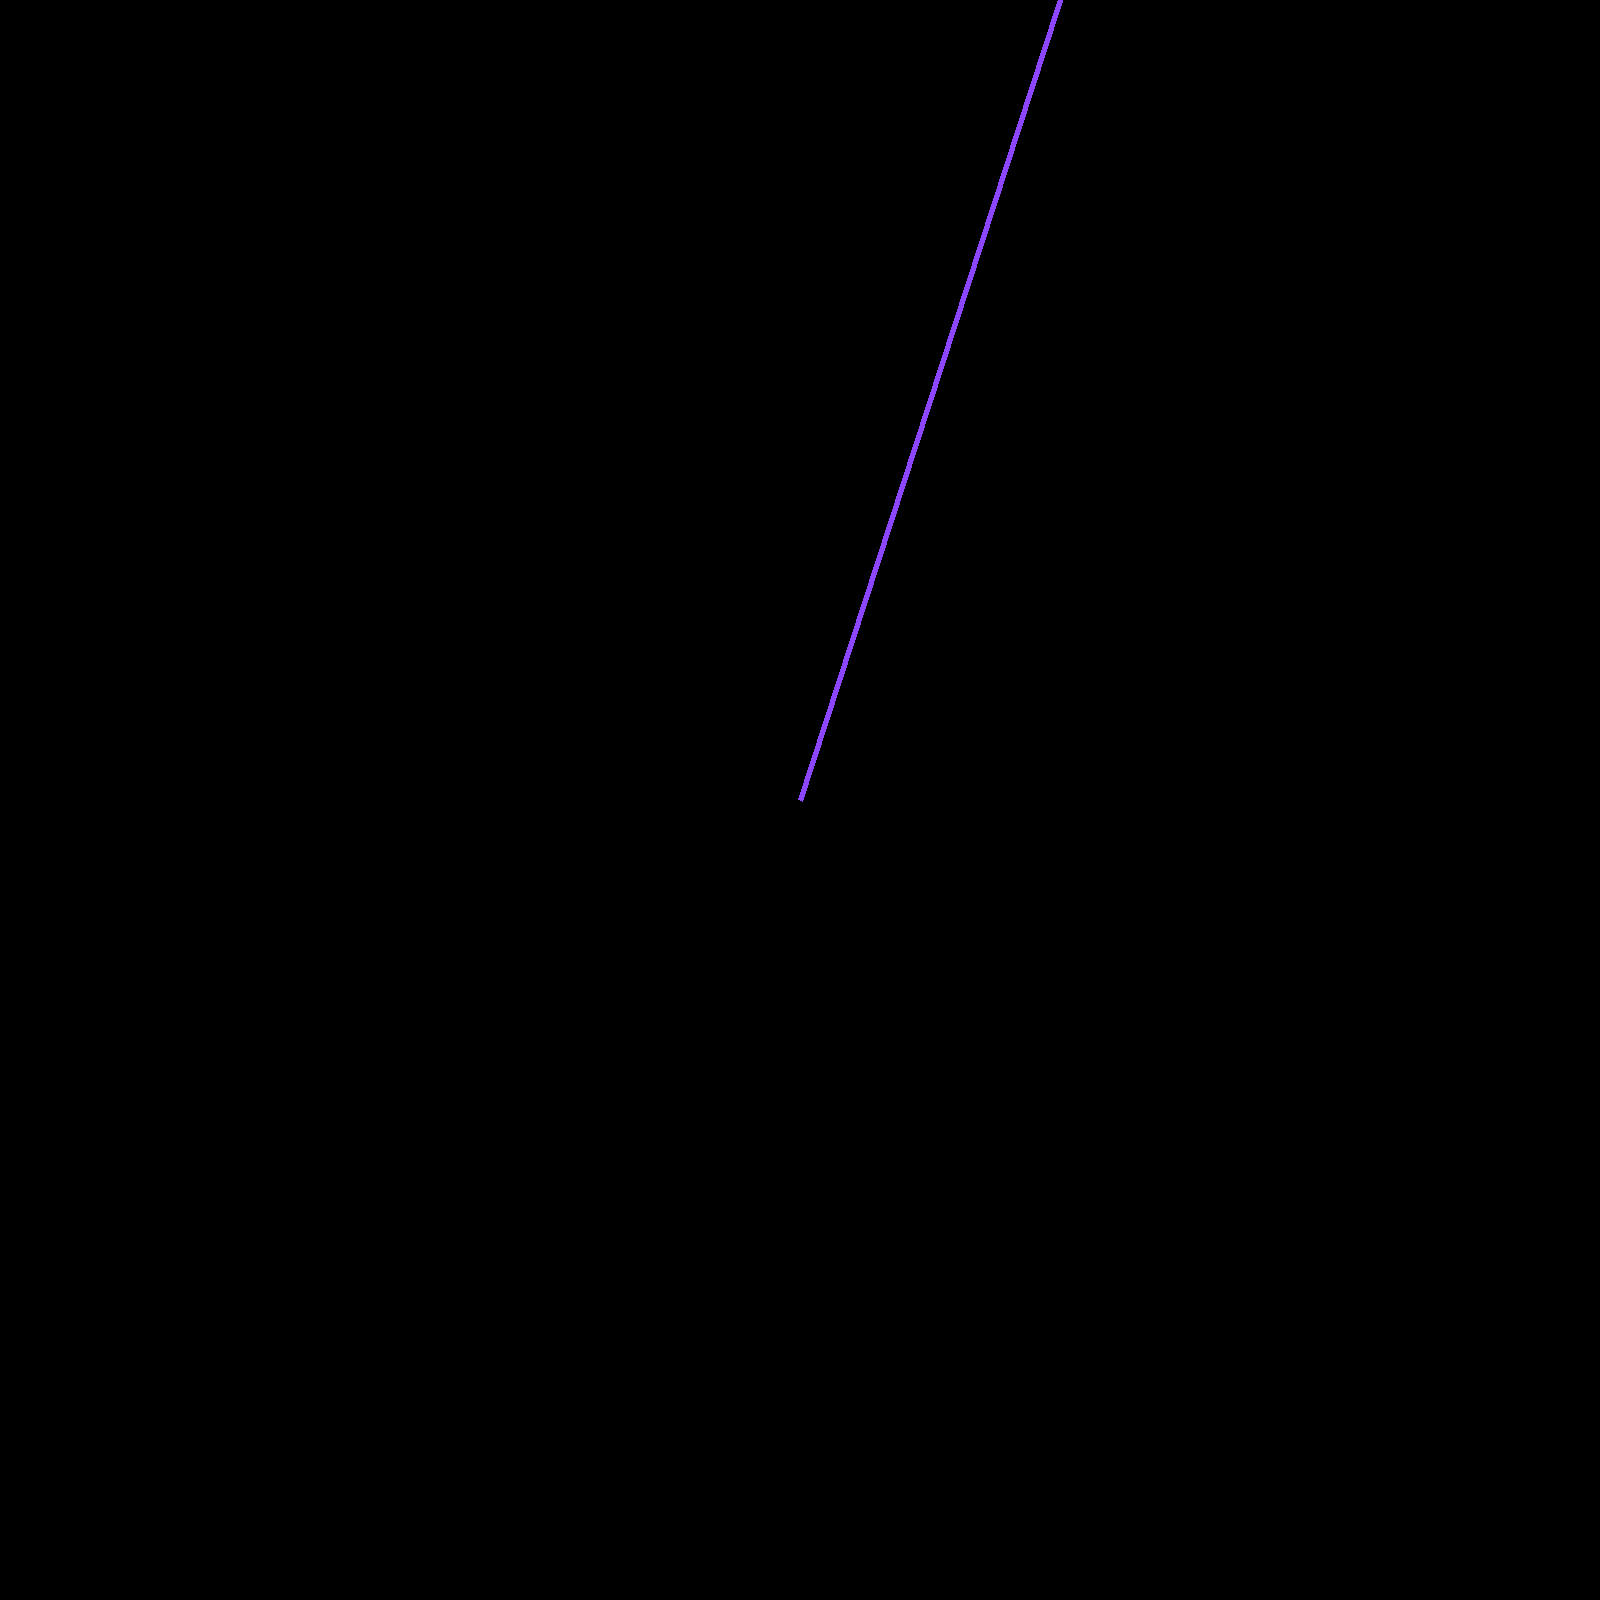

In [139]:
from PIL import Image, ImageDraw, ImageColor, ImageFilter
import numpy as np
WIDTH = 1600
SCALE = 6
def im_init():
    return Image.new(size = (WIDTH, WIDTH), mode = 'RGB')
im = im_init()



def to_point(z):
    x, y = z.real, z.imag
    return (WIDTH / 2 + WIDTH / 8 * x / SCALE, WIDTH / 2 - WIDTH / 8 * y / SCALE)

def draw_hyperbola(im, offset = 0, scale = 1, rotation = 1, theta = np.pi / 2, iterations = 200, size = 5, color = (255, 255, 255)):
    draw = ImageDraw.Draw(im)
    _t = np.linspace(-size, size, iterations)
    theta_2 = (theta - np.pi / 2) / 2
    d1 = np.exp(theta_2 * 1j)
#     print(d1)
    if scale > 0:
        _z = [scale * rotation * (offset + (np.cosh(t) * np.cos(theta / 2)+ np.sinh(t) * 1j * np.sin(theta / 2)))  for t in _t]
    else:
        point_distance = np.cos(theta / 2) + 1j * np.sin(theta / 2) 
        _z = [0, 30 * rotation * point_distance]
#         print(_z)
    _iter = [(_z[i], _z[i + 1]) for i in range(len(_z)- 1)]
    for z12 in _iter:
        (z1, z2) = z12
        p1 = to_point(z1)
        p2 = to_point(z2)
        draw.line((p1, p2), color, width = 5)
    return im

# draw_hyperbola(im)
# draw_hyperbola(im, scale = 2)
# draw_hyperbola(im, 1j)
# draw_hyperbola(im, 1)
# draw_hyperbola(im, 1, theta = np.pi * 2 / 6)
# draw_hyperbola(im, 1, theta = np.pi * 2 * 1 / 5)
# draw_hyperbola(im, offset = 0, theta = np.pi * 2 * 1 / 5)
# draw_hyperbola(im, offset = 0, rotation = np.exp(np.pi / 5 * 1j), theta = np.pi * 2 * 1 / 5)
# draw_hyperbola(im, offset = 0, scale = 0, rotation = np.exp(np.pi / 5 * 1j), theta = np.pi * 2 * 1 / 5)
draw_hyperbola(im, offset = 0, scale = 0, rotation = np.exp(np.pi / 5 * 1j), theta = np.pi * 2 * 1 / 5, color= (140, 70, 255))


In [123]:
_n = list(range(20))
_n.sort(key = lambda x: (x - 1) % 3)
_n

[1, 4, 7, 10, 13, 16, 19, 2, 5, 8, 11, 14, 17, 0, 3, 6, 9, 12, 15, 18]

In [128]:
GOLDEN_RATIO = (np.sqrt(5) - 1) / 2
GOLDEN_RATIO

0.6180339887498949

In [131]:
rotation_0 = np.exp(1j * np.pi * 2 / 7 * GOLDEN_RATIO)

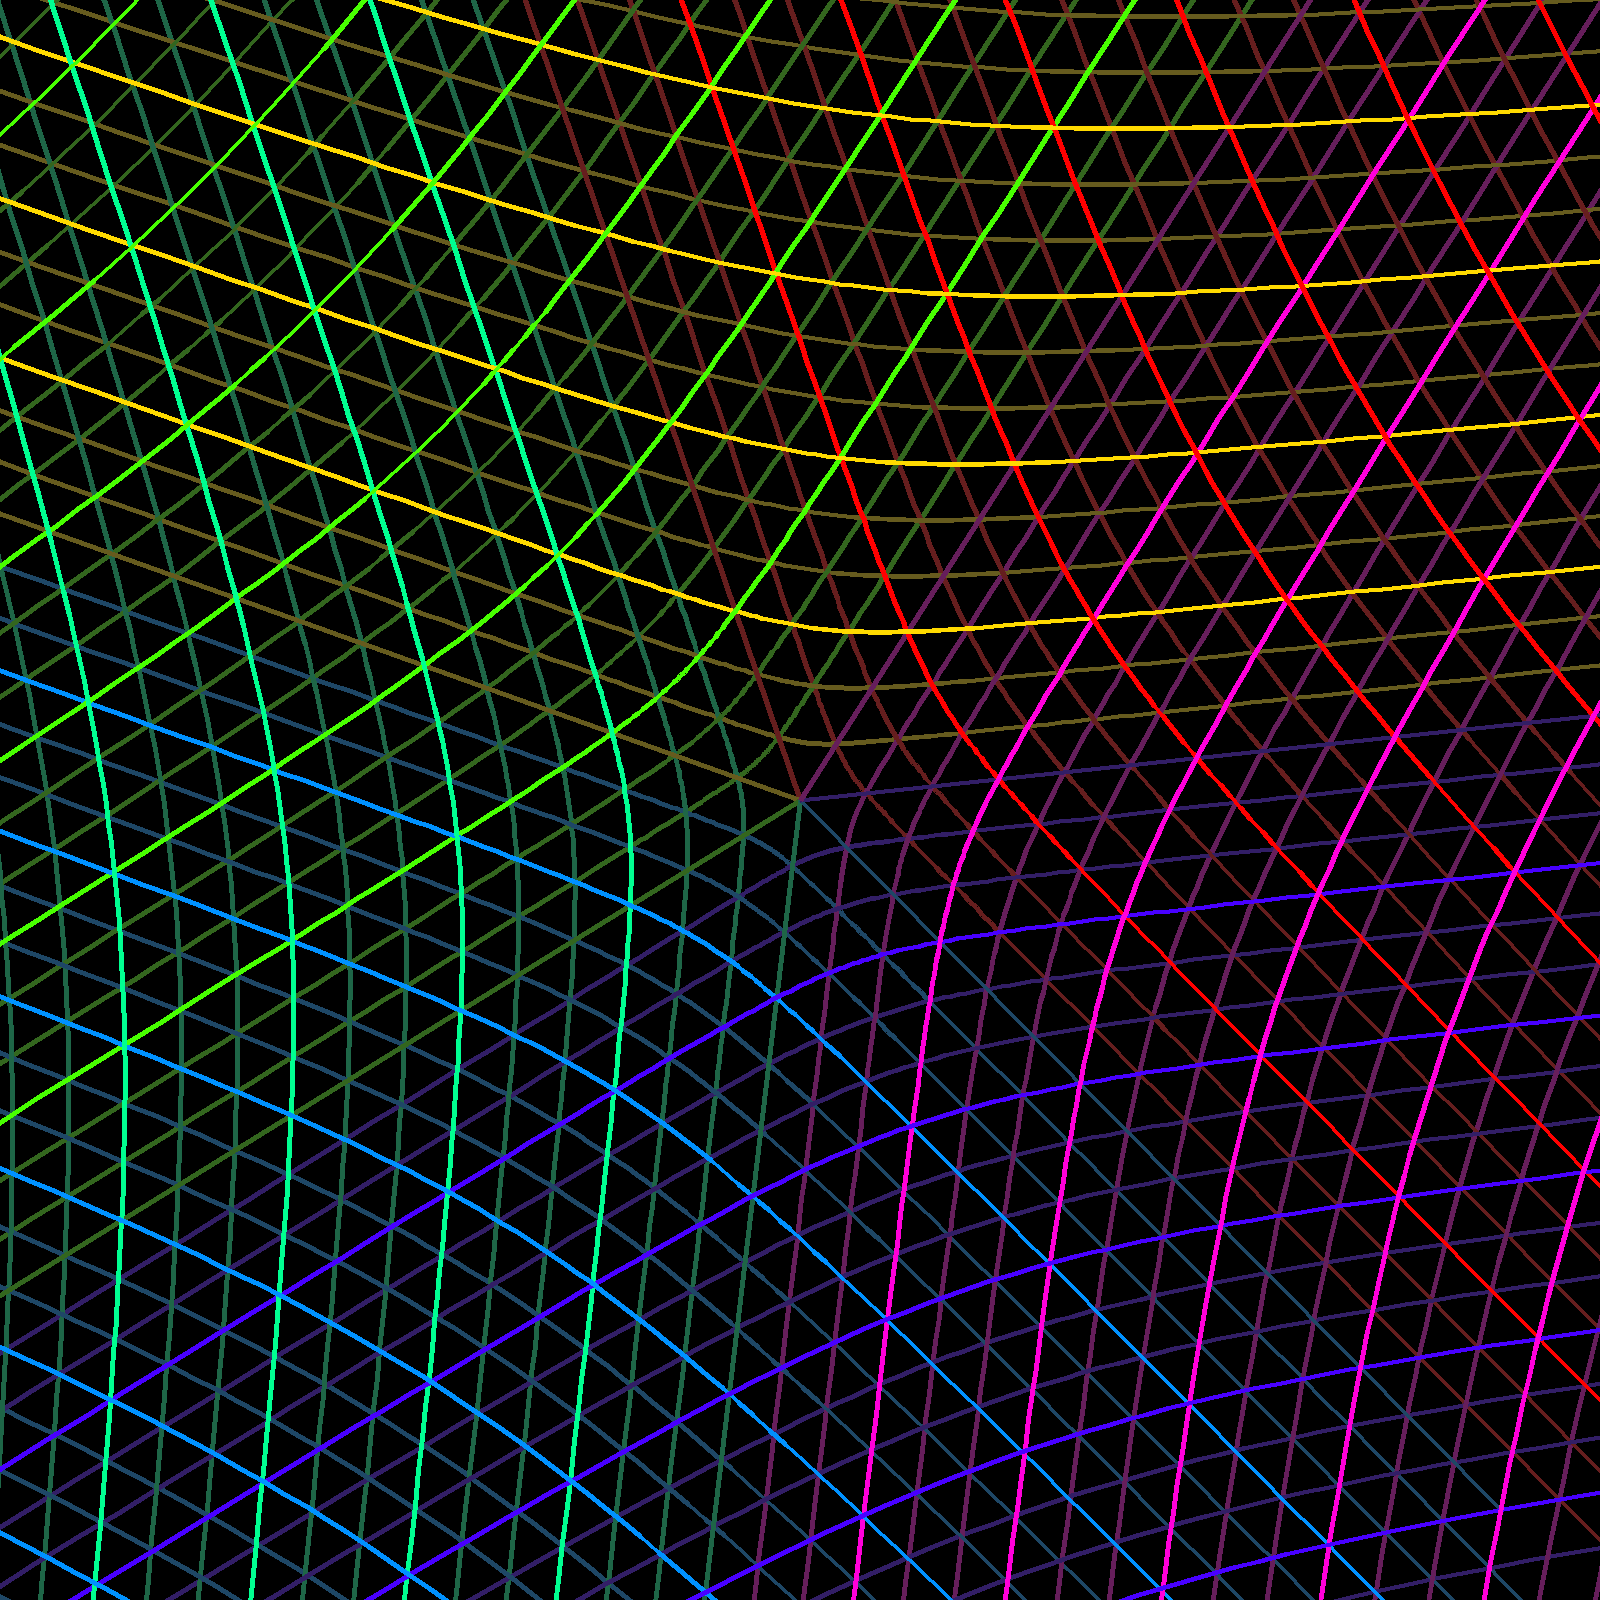

In [142]:
im = im_init()
for n in _n:    
    for no, direction in enumerate(np.linspace(0, np.pi * 2, 7 + 1)[:-1]):
#         if n == 0:
#             n = 0.1  
        if n % 3 == 0 and n > 0:
            saturation = 1
            value = 1
        else:
            saturation = 0.7
            value = 0.4
        color = mycolors.hsv2rgb([no / 7, saturation, value])
        scale = n 
        rotation = np.exp(direction * 1j) * rotation_0
        offset = 1.5
        draw_hyperbola(im, offset = offset, rotation = rotation, scale = scale, theta = np.pi * 2 * 3 / 7, color = color)
im

In [ ]:
import mycolors
# importlib.reload(mycolors)
im = im_init()
_hue = np.linspace(0,1, 7, endpoint = False)
_color = [mycolors.hsv2rgb([hue, 0.5, 0.8]) for hue in _hue]
_color
# draw_hyperbola(im)

# Draw hyperbolas with variating theta
_theta = np.linspace(0, np.pi, 20)
im = im_init()
for theta in _theta:
#     print(theta)
    draw_hyperbola(im, theta = theta)
    
im

delta = np.linspace(0.63, 0.35, 9)

# _n = 0.4 + np.cumsum(delta)

im = im_init() 

# for n in [1.3 ** t for t in np.linspace(0, 7, 10)]:
# _n = [1, 1.6, 2.2, 2.7, 3.2, 3.7, 4.15, 4.55, 4.9, 5.3]
_n = [1, 2, 3, 4, 5]
_n = range(20)

In [4]:
import numpy as np